In [3]:
!pip install -q osmnx geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 1.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.4/338.4 kB 9.2 MB/s eta 0:00:00:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [4]:
#Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import numpy as np

# reproducible
np.random.seed(42)  

In [5]:
# Load from GeoPackage
gdf = gpd.read_file("/kaggle/input/kenya-map-data/kenya_admin.gpkg", layer="country")
counties = gpd.read_file("/kaggle/input/kenya-map-data/kenya_admin.gpkg", layer="counties")



In [6]:
# Load CSV of counties
counties_csv = pd.read_csv("/kaggle/input/kenya-census-data/kenya_census_data.csv")

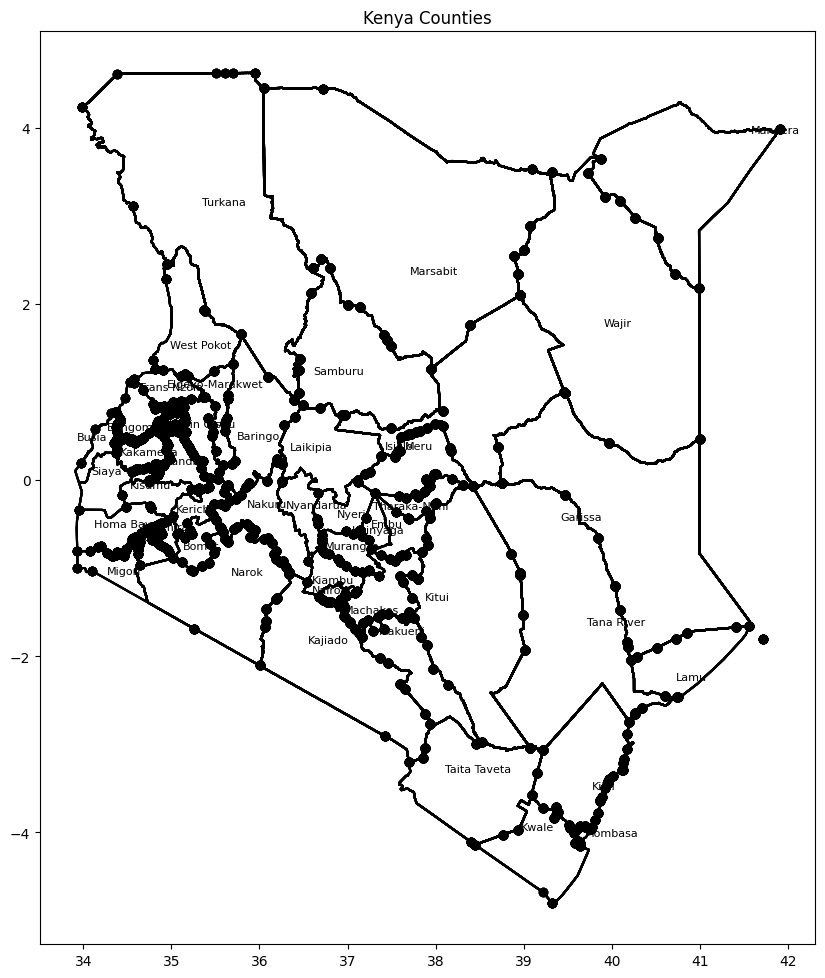

In [7]:
#Get Kenya polygon
kenya_poly = gdf.iloc[0].geometry

#add county boundaries (not sure if this is working right)
counties = gpd.clip(counties, kenya_poly)
# Plot counties
fig, ax = plt.subplots(figsize=(10, 12))
counties.boundary.plot(ax=ax, color="black")

# Overlay centroid labels from CSV
for _, row in counties_csv.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["County"], fontsize=8, ha="center")

ax.set_title("Kenya Counties")
plt.show()

In [8]:
# # get admin boundaries overlapping Kenya
# tags = {"boundary": "administrative"}
# gdf_admin = ox.features_from_polygon(kenya_poly, tags)

In [ ]:
# keep only counties (admin_level=4)
gdf_counties = gpd.read_file("/kaggle/input/kenya-map-data/kenya_admin_levels.geojson")
#gdf_admin[gdf_admin["admin_level"] == "4"].copy()

'''
1. Filter only Kenyan counties

Many Kenyan counties in OSM have an ISO3166-2 code like KE-xx.
So you can drop anything that doesn’t start with KE-.
'''
if "ISO3166-2" in gdf_counties.columns:
    gdf_counties = gdf_counties[gdf_counties["ISO3166-2"].str.startswith("KE-", na=False)]

# clean up labels

# Use name:en (English) if available, else fall back to name or official_name.

if "name:en" in gdf_counties.columns:
    gdf_counties["label"] = (
        gdf_counties["name:en"]
        .fillna(gdf_counties["name"])
        .fillna(gdf_counties["official_name"])
    )
else:
    gdf_counties["label"] = gdf_counties["name"]

In [ ]:
# Plot counties
fig, ax = plt.subplots(figsize=(10, 12))
gdf_counties.boundary.plot(ax=ax, color="black")

# Overlay centroid labels from CSV
for _, row in counties_csv.iterrows():
    ax.text(row["Longitude"], row["Latitude"], row["County"], fontsize=8, ha="center")

ax.set_title("Kenya Counties")
plt.show()

In [ ]:
counties_csv

In [ ]:
# Ensure county names are clean on both sides
counties["name"] = counties["name"].str.strip().str.title()
counties_csv.drop(columns = ['geometry'],inplace=True)
# Merge CSV with OSMnx data
counties_merged = gdf_counties.merge(counties_csv, left_on="name", right_on="County", how="outer")

# Now counties_merged has both geometries + centroid info
#save counties merged.

In [ ]:
# Add fake population column
ax = counties_merged.plot(column="TOTAL_POP", legend=True)
plt.title("Population by County in Kenya", fontsize=16)
#plt.axis("off")  # optional, to hide axes
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [ ]:
counties_merged[counties_merged['CODE']==1]

In [ ]:
counties_csv[counties_csv['CODE']==6]

In [ ]:
gdf_counties["name"].unique()